# Domain Reconstruction

In [1]:
from Helpers.TF_reconstruction import GeoTAETr
from Main.test_manifold_algorithms import test_manifold_algorithms as tma
from mashspud.SPUD import SPUD
import matplotlib.pyplot as plt
import seaborn as sns

dc = tma("iris.csv", split = "distort", verbose = 0)

2025-02-05 10:03:35.635026: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-05 10:03:35.657066: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-05 10:03:35.663719: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-05 10:03:35.681898: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-05 10:03:37.591977: W tensorflow/compiler/tf2

In [2]:
import numpy as np

def scatter_plot(x, y, labels, title="Scatter Plot", colormap="viridis", emb = None, domain = None):
    # Ensure labels is a numpy array
    labels = np.array(labels)
    unique_labels = np.unique(labels)
    # Create a colormap with as many colors as needed
    colors = plt.cm.get_cmap(colormap, len(unique_labels))
    
    plt.figure(figsize=(8,6))
    
    for i, label in enumerate(unique_labels):
        idx = labels == label
        plt.scatter(x[idx], y[idx], label=str(label), color=colors(i), s=70, alpha=0.8, edgecolor='black')
    
    if emb is not None:
        # Plot emb points as triangles; assuming emb is a (n,2) array
        plt.scatter(emb[:,0], emb[:,1], label="emb", marker="^", c=np.hstack([labels, labels]), s=40, alpha=0.8, edgecolor='black')

    if domain is not None:
        # Plot emb points as triangles; assuming emb is a (n,2) array
        plt.scatter(domain[:,0], domain[:,1], label="Domain", marker="d", c=labels, s=40, alpha=0.8, edgecolor='black')

    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)
    plt.show()

## The GeoTAETr Tests

RF score on full embedding: 0.9366666666666666
Cross Embedding score: None
Fraction of Samples Closest to thier Match: 0.0002222222222222222


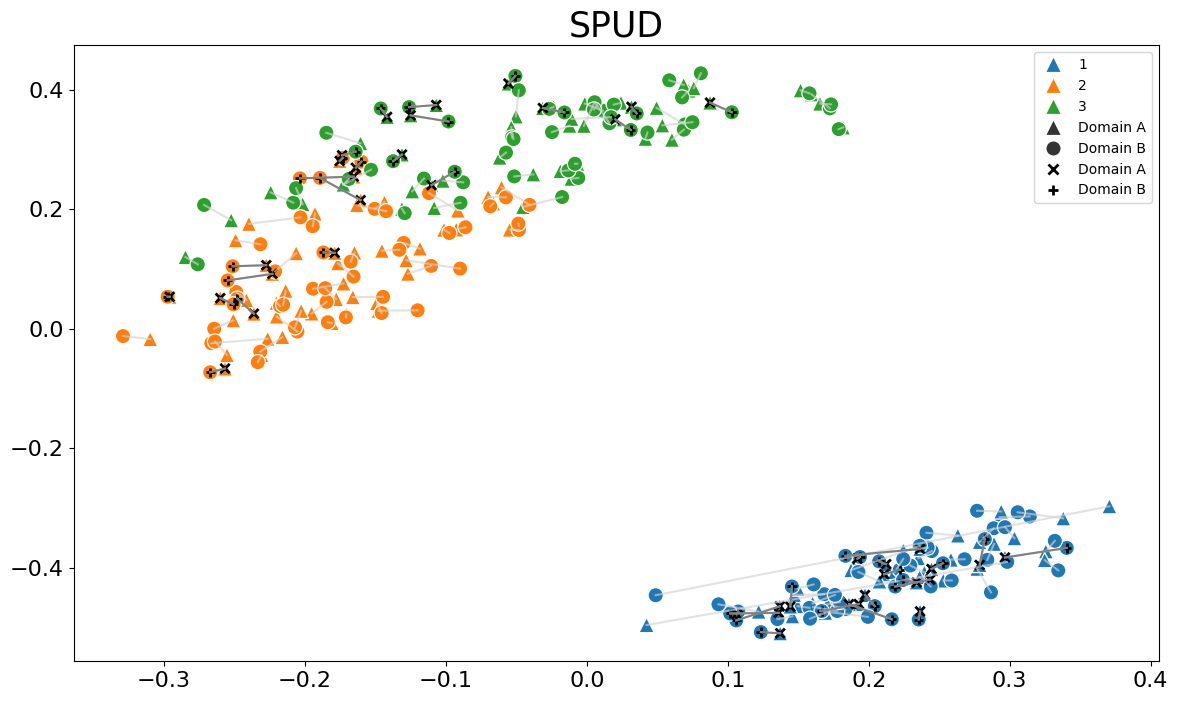

In [3]:
# Fit spud
spud = SPUD()
spud.fit(dc.split_A, dc.split_B, dc.anchors[:40])
spud.plot_emb(labels = dc.labels_doubled)

In [4]:
# Build the GeoTAETr
geoA = GeoTAETr(verbose = 0)
geoA.fit(dc.split_A, spud.emb[:spud.len_A])

Epoch 1/50


ValueError: Input 0 of layer "encoder" is incompatible with the layer: expected shape=(None, 4), found shape=(None, 2)

In [ ]:
A_to_Z = geoA.encode(dc.split_A)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


/tmp/ipykernel_156986/1890582921.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(colormap, len(unique_labels))


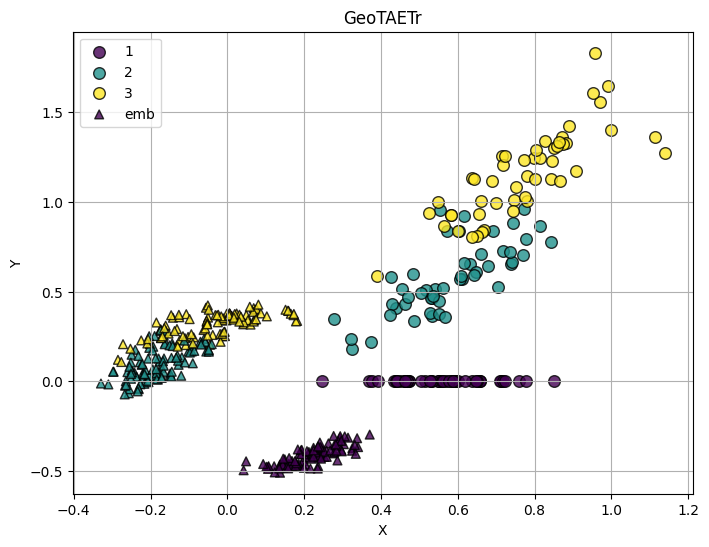

In [ ]:
scatter_plot(A_to_Z[:,0], A_to_Z[:,1], dc.labels, emb = spud.emb,  title="GeoTAETr", colormap="viridis")

### GeoTAETr B structure

In [ ]:
geoB = GeoTAETr(verbose = 0)
geoB.fit(dc.split_B, spud.emb[spud.len_A:])
B_to_Z = geoB.encode(dc.split_B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0755
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0748
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0742
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0735
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0728
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0719
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0710
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0700
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0689
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0678
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0666
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0653
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0641
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0629
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0618
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━

/tmp/ipykernel_156986/1890582921.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(colormap, len(unique_labels))


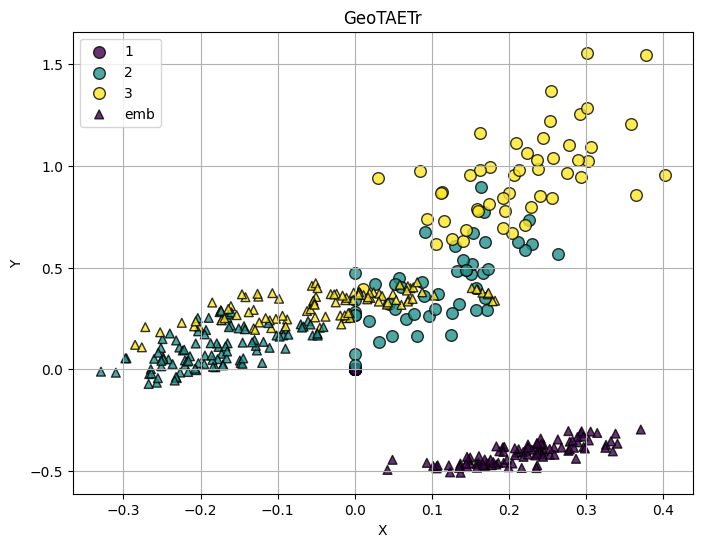

In [ ]:
scatter_plot(B_to_Z[:,0], B_to_Z[:,1], dc.labels, emb = spud.emb,  title="GeoTAETr", colormap="viridis")

### Build the twin geoTAETr strutcture

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/tmp/ipykernel_156986/1890582921.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(colormap, len(unique_labels))


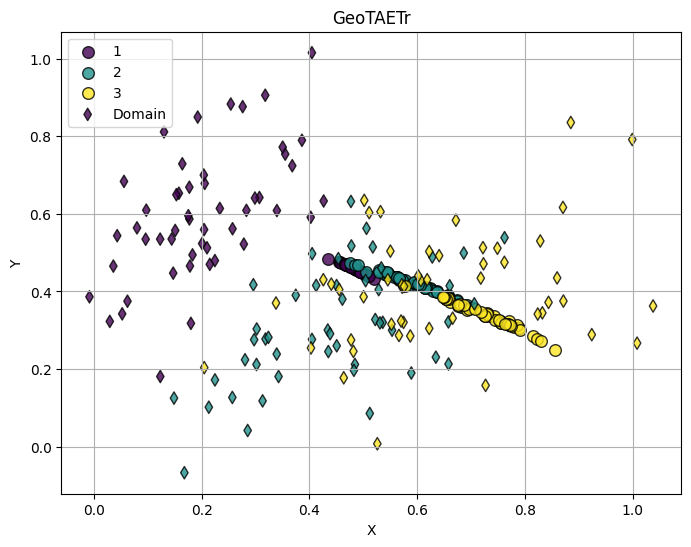

In [9]:
A_to_B = geoB.decode(A_to_Z)
scatter_plot(A_to_B[:,0], A_to_B[:,1], dc.labels, domain = dc.split_B,  title="GeoTAETr", colormap="viridis")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


/tmp/ipykernel_156986/1890582921.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(colormap, len(unique_labels))


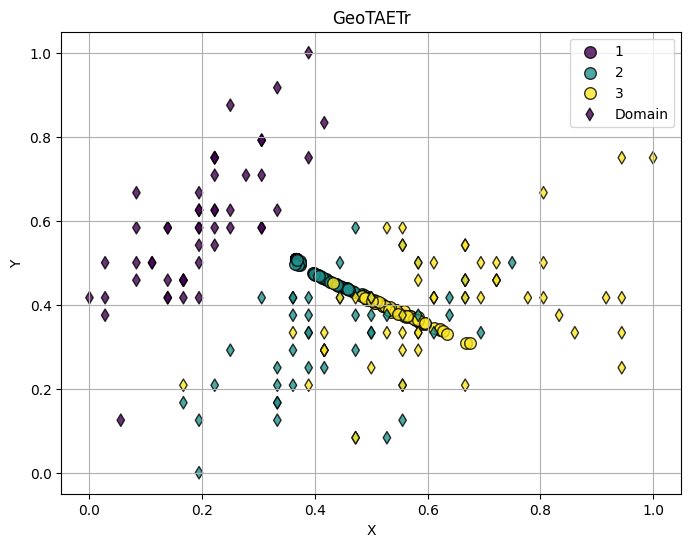

In [10]:
B_to_A = geoA.decode(B_to_Z)
scatter_plot(B_to_A[:,0], B_to_A[:,1], dc.labels, domain = dc.split_A,  title="GeoTAETr", colormap="viridis")

# Comparisions Against Exsisting

## Comparison against MAGAN and DTA

In [13]:
from Helpers.Pipeline_Helpers import get_MAGAN_block
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

from AlignmentMethods.MAGAN import run_MAGAN, get_pure_distance, magan 

# Get data ready
from Main.test_manifold_algorithms import test_manifold_algorithms as tma
from mashspud import SPUD 
from Helpers.Grae import *

dc4 = tma("iris.csv", split = "even", verbose = 5, random_state=12)

MDS initialized with 2 components

 
 
---------------------------       Initalizing class with iris.csv data       ---------------------------

The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)


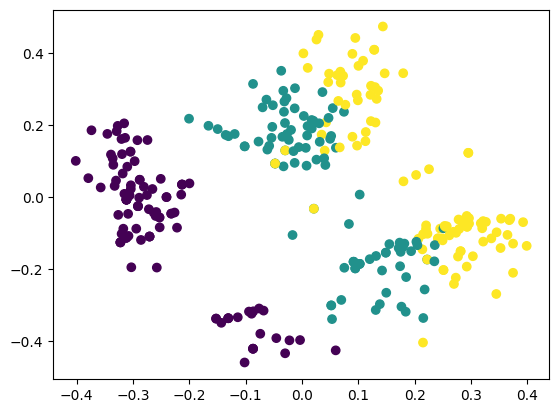

In [14]:
#Create MAGAN
domain_a, domain_b, domain_ab, domain_ba, magan = run_MAGAN(dc4.split_A, dc4.split_B, dc4.anchors[:15], 0.001, return_MAGAN=True)

#Create original block
domain_a, domain_b = get_pure_distance(domain_a, domain_b)
domain_ab, domain_ba = get_pure_distance(domain_ab, domain_ba)

#Return a different thing back to calculate FOSCTTM and CE
m_block = get_MAGAN_block([domain_a, domain_b, domain_ab, domain_ba])

mds = MDS(metric=True, dissimilarity = 'precomputed', n_init = 4,
                      n_jobs=4, random_state = 42, n_components = dc4.n_comp)
emb = mds.fit_transform(m_block)

#Plot the embedding
plt.scatter(emb[:, 0], emb[:, 1], c = dc4.labels_doubled)

/tmp/ipykernel_127800/1890582921.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(colormap, len(unique_labels))


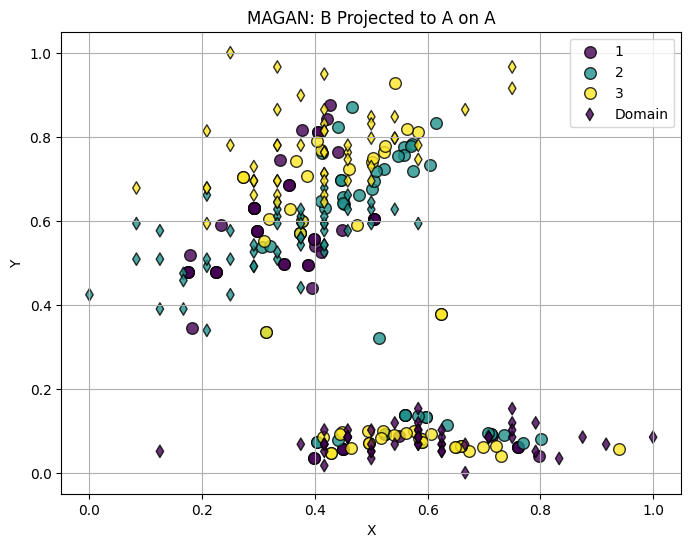

In [18]:
A_to_B = magan.translate_1_to_2(dc4.split_A)
#plt.scatter(A_to_B[:, 0], A_to_B[:, 1], c = dc4.labels)
scatter_plot(A_to_B[:,0], A_to_B[:,1], dc4.labels, domain = dc4.split_B,  title="MAGAN: B Projected to A on A", colormap="viridis")

/tmp/ipykernel_127800/1890582921.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(colormap, len(unique_labels))


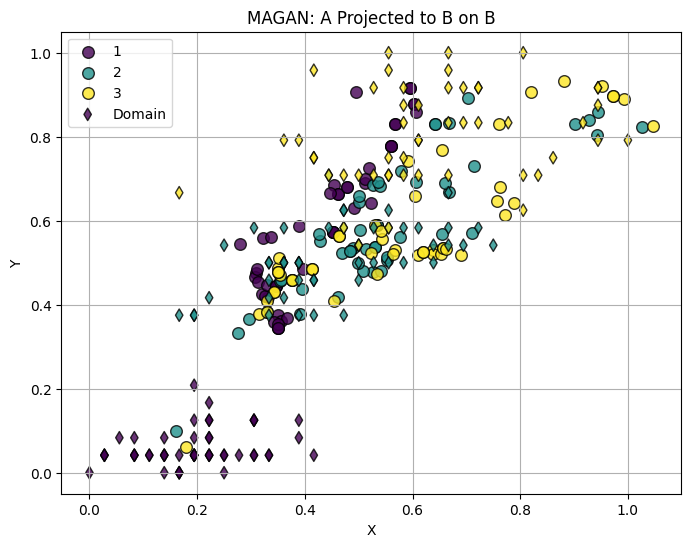

In [17]:
B_to_A = magan.translate_2_to_1(dc4.split_B)
#plt.scatter(B_to_A[:, 0], B_to_A[:, 1], c = dc4.labels)
scatter_plot(B_to_A[:,0], B_to_A[:,1], dc4.labels, domain = dc4.split_A,  title="MAGAN: A Projected to B on B", colormap="viridis")

/tmp/ipykernel_127800/1890582921.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(colormap, len(unique_labels))


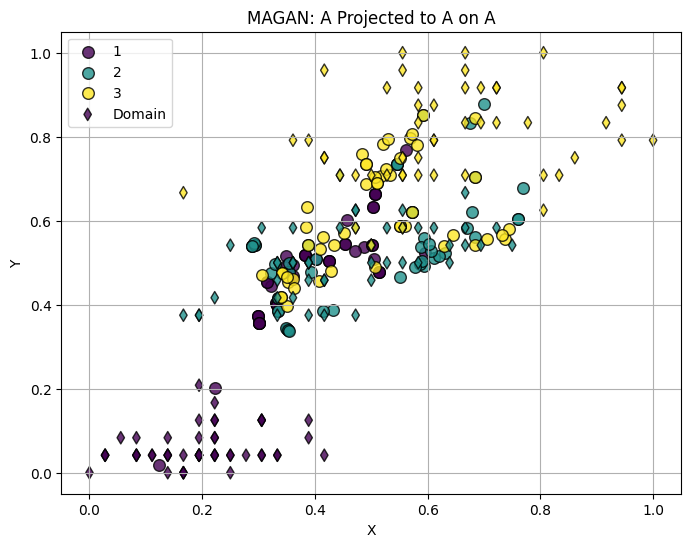

In [19]:
A_to_A = magan.translate_2_to_1(A_to_B)
#plt.scatter(A_to_A[:, 0], A_to_A[:, 1], c = dc4.labels)
scatter_plot(A_to_A[:,0], A_to_A[:,1], dc4.labels, domain = dc4.split_A,  title="MAGAN: A Projected to A on A", colormap="viridis")

In [6]:
dc4.split_A.shape

(150, 2)

### DTA

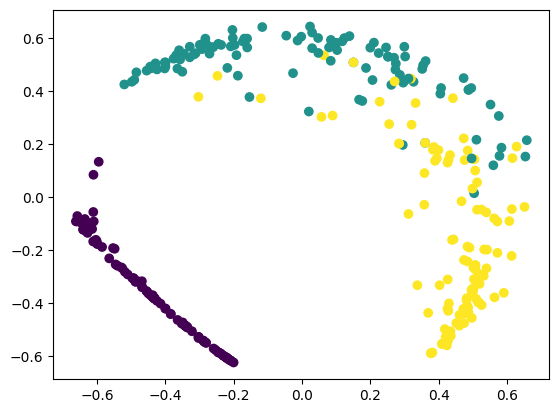

In [7]:
from Helpers.Pipeline_Helpers import Andres_fit
from AlignmentMethods.DTA_andres import DTA

dta = DTA(knn = 35,random_state=42, t = 20, verbose = 0)
dta = Andres_fit(dta, dc4, dc4.anchors[:15])
dta_block = 1 - tma.normalize_0_to_1(None, dta.W)
dta_emb = mds.fit_transform(dta_block)
plt.scatter(dta_emb[:, 0], dta_emb[:, 1], c = dc4.labels_doubled)

/tmp/ipykernel_127800/1890582921.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(colormap, len(unique_labels))


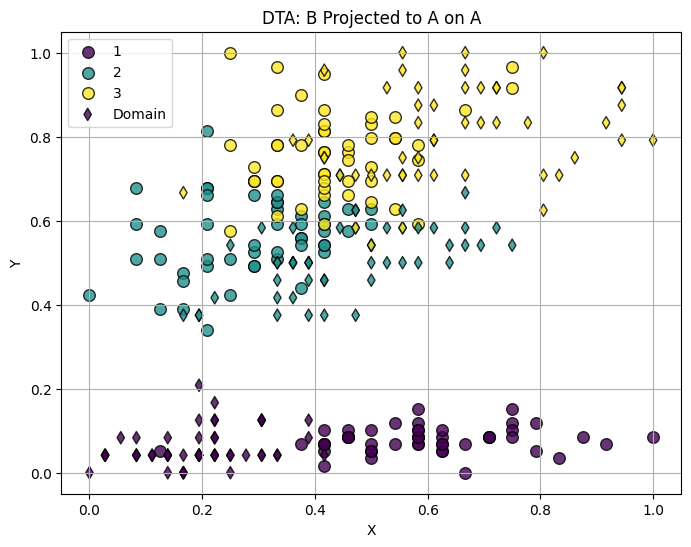

In [20]:
B_to_A = dta.T @ dc4.split_B
#plt.scatter(B_to_A[:, 0], B_to_A[:, 1], c = dc4.labels[:150])
scatter_plot(B_to_A[:,0], B_to_A[:,1], dc4.labels, domain = dc4.split_A,  title="DTA: B Projected to A on A", colormap="viridis")

/tmp/ipykernel_127800/1890582921.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(colormap, len(unique_labels))


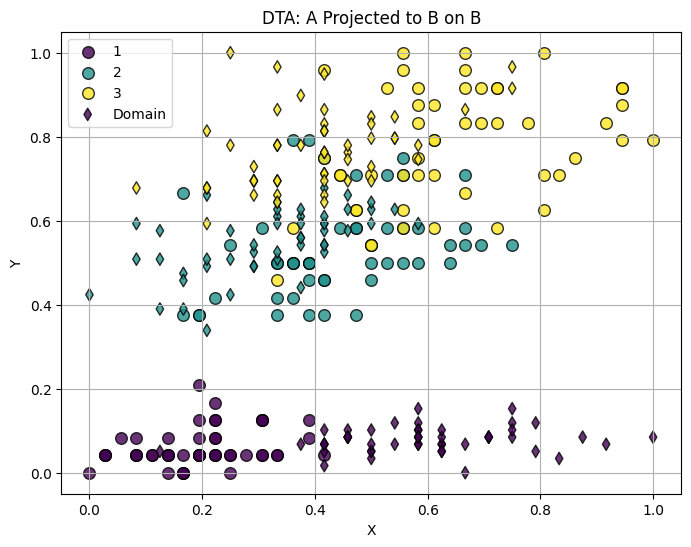

In [21]:
A_to_B =  dta.T @ dc4.split_A 
#plt.scatter(A_to_B[:, 0], A_to_B[:, 1], c = dc4.labels[:150])
scatter_plot(A_to_B[:,0], A_to_B[:,1], dc4.labels, domain = dc4.split_B,  title="DTA: A Projected to B on B", colormap="viridis")

/tmp/ipykernel_127800/1890582921.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(colormap, len(unique_labels))


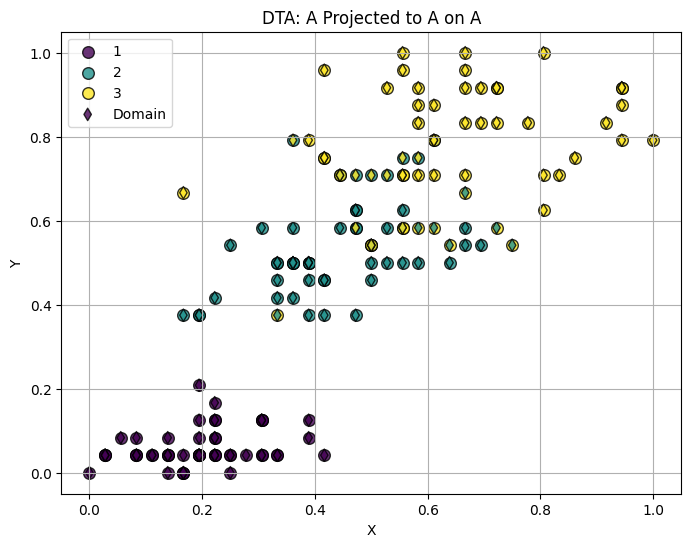

In [22]:
#Full cycle? Just a theory
A_to_A = dta.T @ A_to_B
#plt.scatter(A_to_A[:, 0], A_to_A[:, 1], c = dc4.labels[:150])
scatter_plot(A_to_A[:,0], A_to_A[:,1], dc4.labels, domain = dc4.split_A,  title="DTA: A Projected to A on A", colormap="viridis")

## MASH

Time Data Below
 Time it took to execute the graph for domain A:  0.08375
 Time it took to compute kernal A:  0.00012
 Time it took to execute the graph for domain B:  0.06955
 Time it took to compute kernal B:  0.00012
 Time it took to compute merge_graphs function:  0.02484
 Time it took to compute similarity_matrix function:  0.00058
Using optimal t value of 24
 Time it took to compute diffusion process:  0.22765
Fit process finished. We recommend calling optimize_by_creating_connections.
Time it took to calculate the embedding: 0.56125
RF-GAP score is accuracy
Cross Embedding score: None
Fraction of Samples Closest to thier Match: 0.12568888888888888
RF score trained on full Embedding: 0.9333333333333333


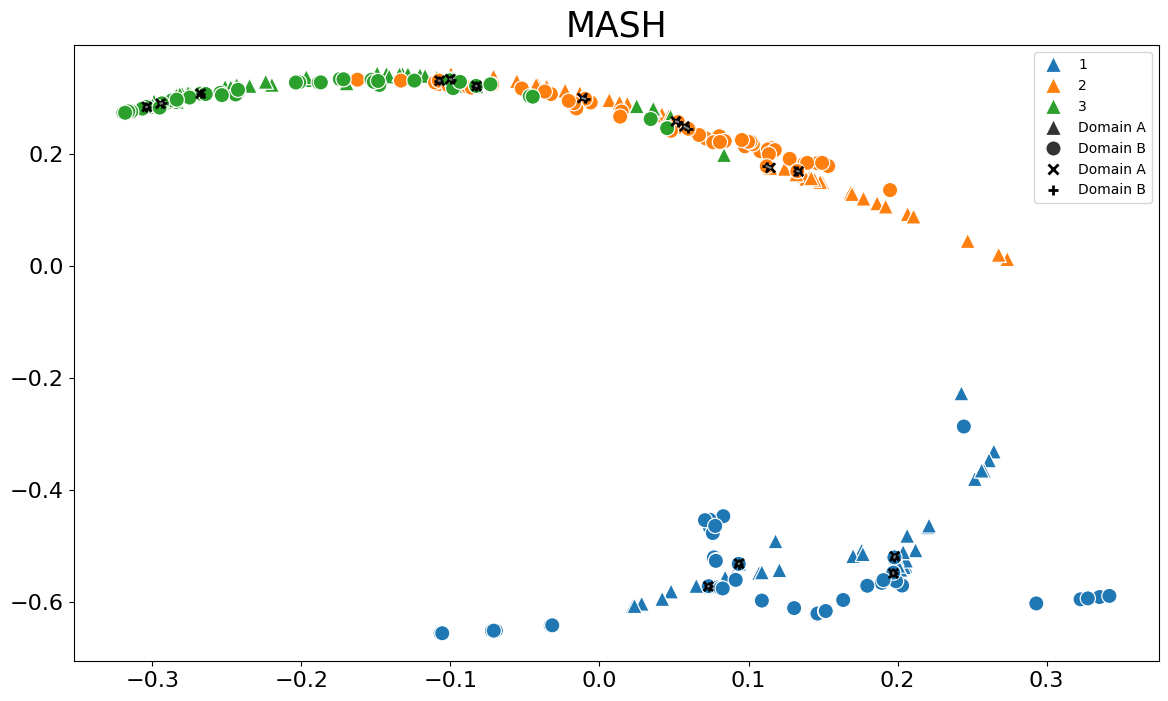

In [42]:
from mashspud.MASH import MASH
import matplotlib.pyplot as plt
dc4 = tma("iris.csv", split = "even", verbose = 0, random_state=12)
mash = MASH(knn = 8, random_state=42, verbose = 3, t = -1)
mash.fit(dc4.split_A, dc4.split_B, dc4.anchors[:15])
mash.plot_emb(labels = dc4.labels_doubled, show_lines = False)


/tmp/ipykernel_127800/1890582921.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(colormap, len(unique_labels))


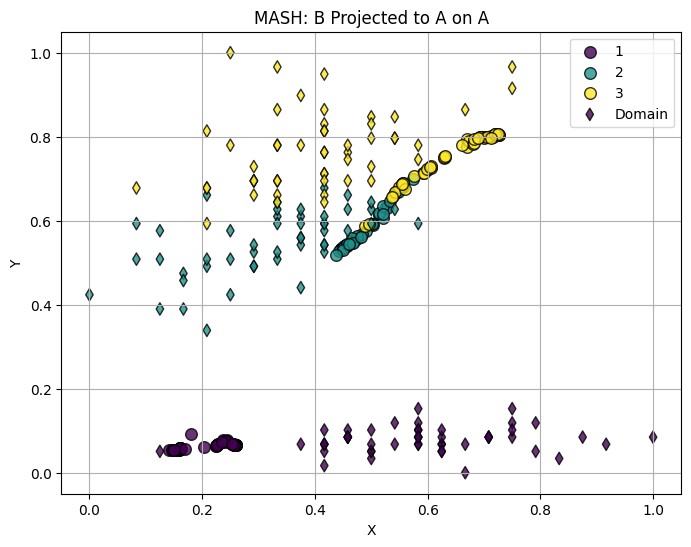

In [43]:
A_to_B = mash.project_feature(predict_with = "A")
scatter_plot(A_to_B[:,0], A_to_B[:,1], dc4.labels, domain = dc4.split_B,  title="MASH: B Projected to A on A", colormap="viridis")

/tmp/ipykernel_127800/1890582921.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(colormap, len(unique_labels))


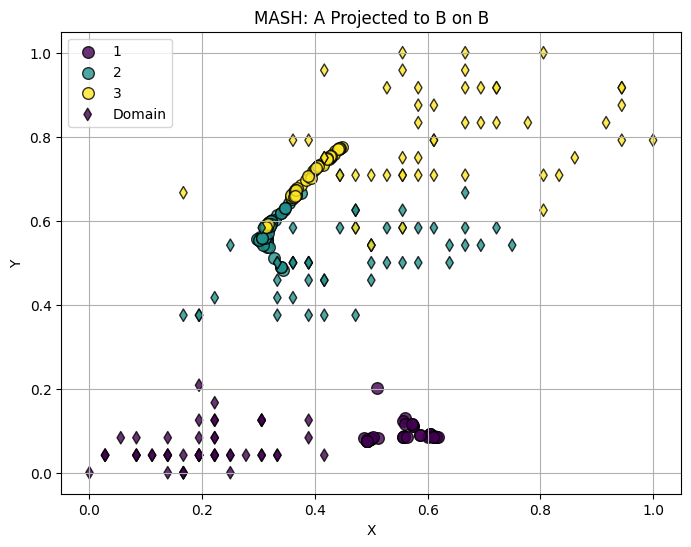

In [44]:
B_to_A = mash.project_feature(predict_with = "B")
scatter_plot(B_to_A[:,0], B_to_A[:,1], dc4.labels, domain = dc4.split_A,  title="MASH: A Projected to B on B", colormap="viridis")

/tmp/ipykernel_127800/1890582921.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(colormap, len(unique_labels))


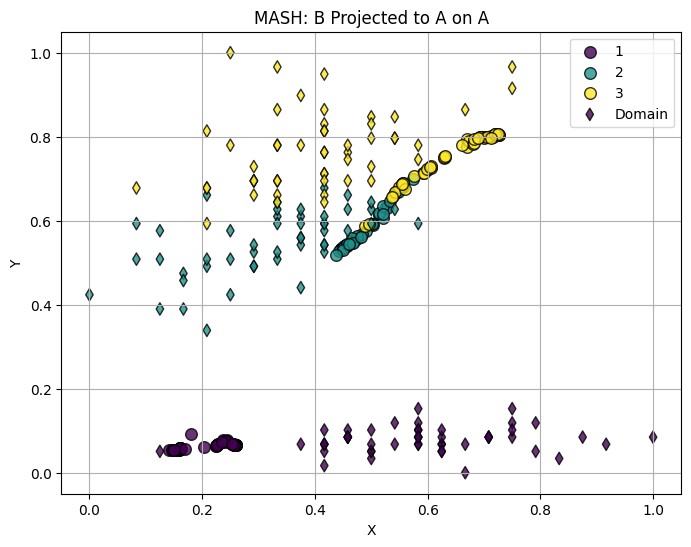

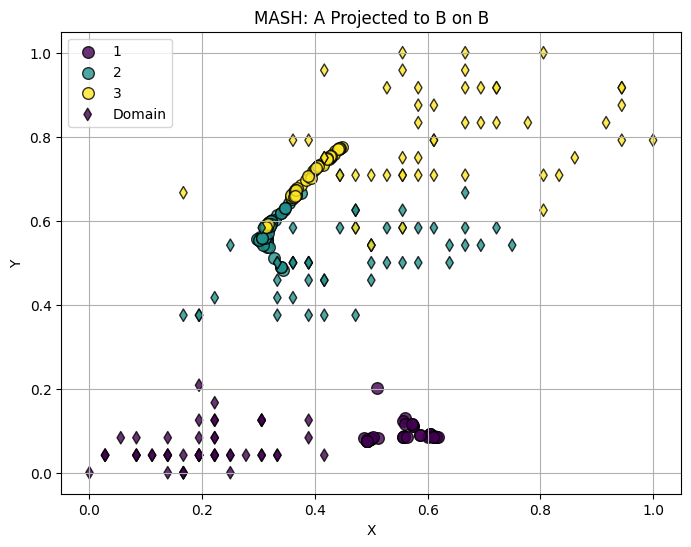

In [45]:
#Normalize to do it DTA style
# mash.projectionBA = mash.projectionBA / mash.projectionBA.max()
# mash.projectionAB = mash.projectionAB / mash.projectionAB.max()

A_to_B = mash.projectionBA @ dc4.split_A
scatter_plot(A_to_B[:,0], A_to_B[:,1], dc4.labels, domain = dc4.split_B,  title="MASH: B Projected to A on A", colormap="viridis")
plt.show()

B_to_A = mash.projectionAB @ dc4.split_B
scatter_plot(B_to_A[:,0], B_to_A[:,1], dc4.labels, domain = dc4.split_A,  title="MASH: A Projected to B on B", colormap="viridis")